# Assignment 2: Reinforcement Learning
Name: Alexander Terskin

UID: 115912090




Please submit a PDF containing all outputs to gradescope by March 26th at 11:59 PM.


----------------------------


In this assignment you will learn how to train a simple environment using Q-learning as taught in class.


First you will use a popular python package called gymnasium to create a simple Grid World environment.

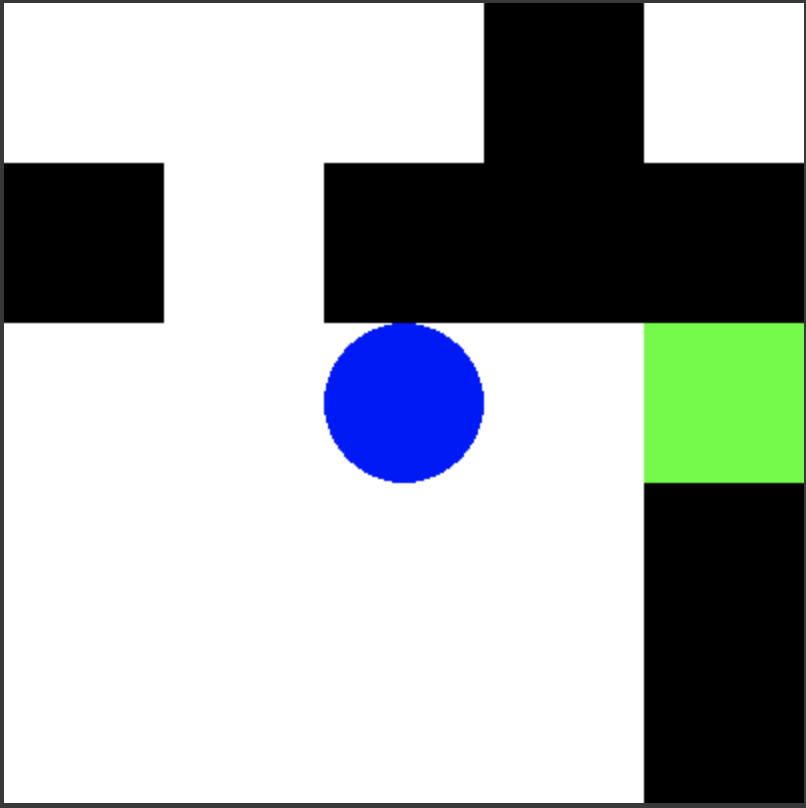

After you have a working environment you will implement Q-Learning and use it to solve your implementation of grid world.

Finally, you will show that you have implemented everything correctly by showing that you can use your Q-Learning algorithm to train an environment already included in the gymnasium package.

# Part 1: Implementing a Gymnasium Environment

We will start by implementing a simple gymnasium environment. You can find documentation for the whole package here https://gymnasium.farama.org/index.html#.

First let's install the necessary packaged

In [ ]:
# Install the necessary packages
!pip install gymnasium pyvirtualdisplay > /dev/null 2>&1
!pip install pygame

Next we'll import the packages you'll need

In [ ]:
import gymnasium as gym
from gymnasium import spaces
import numpy as np
import pygame

First we will initialize our new class. This class will need to take in 3 arguments. The width and height of the grid as well as the description for our grid world environment.


Your environment must be able to handle any given width and height as well as any given description. The description will come in the form of a string that specify the block order from left to right. There are three possible types of blocks.


1.   "I" specifies that a block should be ice
2.   "H" specifies that a block should be a hole
3.   "G" specifies that a block should be the goal.

For example an environment with width 3, height 3 and a description "IIHHIIIIG" looks like this

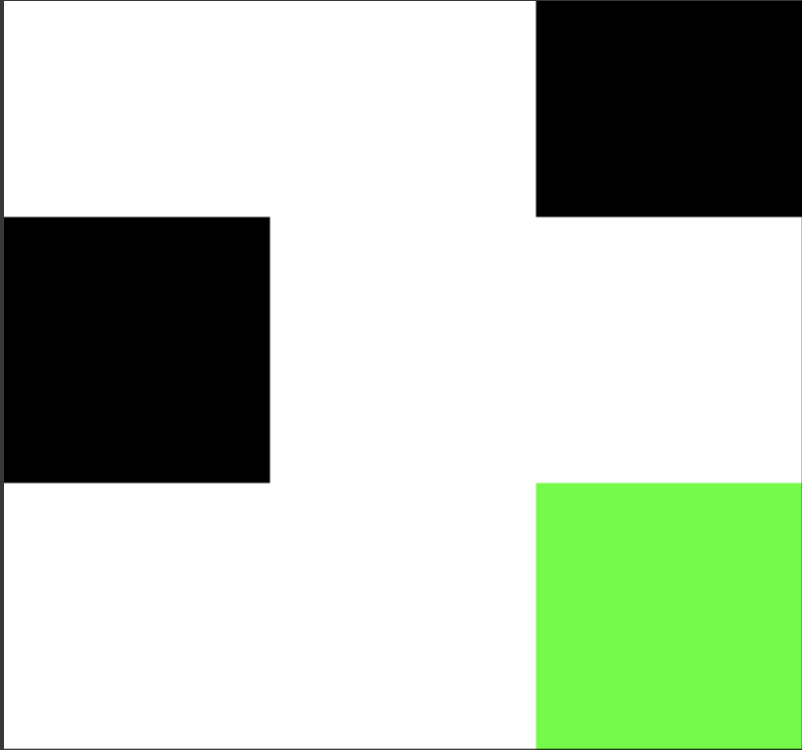

Every gymnasium class must define an observation and an action space of type "space." You can find a description of spaces here https://gymnasium.farama.org/api/spaces/. In addition to the space you will probably want to include other information in the init function such as the location of the agent and the description of the grid. These are style choices please represent these however you would like.




In [ ]:
class FrozenLake(gym.Env):
  # First we will initialize our new class. This class will need to take in 3 arguments.
  # The width and height of the grid as well as the description for our grid world environment.
  def __init__(self, grid_width, grid_height, grid_description):

    self.width = grid_width
    self.height = grid_height
    self.grid_description = grid_description
    self.observation_space = spaces.Discrete(self.width * self.height)
    # have 4 action spaces
    self.action_space = spaces.Discrete(4)


    def init_grid(self):

      grid = []
      idx = 0

      for i in range (self.height):
        row = []
        for j in range(self.width):
          row.append(self.grid_description[idx])
          idx += 1
        grid.append(row)

      return grid

    # variable for the current grid
    self.grid = init_grid(self)

    # variable for agent's current position
    self.agent_current_position = 0

    self.observation = 0

The next method you will define for your class is the _get_obs method. This should return the observation for your environment. Think of how we defined an observation in class and return that here.

In [ ]:
class FrozenLake(FrozenLake):
  def _get_obs(self):
    # returning the current position of the agent
    return self.agent_current_position

Next, please define a reset function. This should return your environment to its original state. We have returned the correct output for you. All you need to do is reset any necessary variables.


In [ ]:
class FrozenLake(FrozenLake):
  def reset(self, seed=None, options=None):
    super().reset(seed=seed)

    observation = self._get_obs()
    info = self._get_info()

    # resetting agent position back to position 0
    self.agent_current_position = 0

    return observation, info


  def _get_info(self):
    # idk but returning observation works
    return self.observation

Now write the method that will return the reward for a given observation.

Hint: In addition to thinking about rewards in the grid you will need to account for rewards when the agent "escapes" the grid.

In [ ]:
class FrozenLake(FrozenLake):
  def compute_reward(self, observation):

    # getting agent's position as a tuple
    row, col = divmod(observation, self.width)

    # checking if agent is out of bounds and giving it a negative reward
    if row >= self.height or col >= self.width or row < 0 or col < 0:
      return -1

    # checking contents of current cell if agent is still in bounds
    current_cell = self.grid[row][col]
    if current_cell == 'G':
      return 1
    elif current_cell == "H":
      return -1
    else:
      # discounting if cell is ice (empty)
      return -0.01

Given an action you will want to modify the current state of your environment to account for the action. Additionally, given the observation and reward determine if the episode is over or not.

Hint: you will need to determine if the agent is out of the grid(either out of bounds or in a hole) or at the goal.

In [ ]:
class FrozenLake(FrozenLake):
  def step(self, action):

    # getting agents current position
    row, col = divmod(self.agent_current_position, self.width)

    # going left
    if action == 0:
      # checking if going left will not make agent go out of bounds
      if col > 0:
        col -= 1

    # going down
    elif action == 1:
      # checking if going left will not make agent go out of bounds
      if row < self.height - 1:
        row += 1

    # going right
    elif action == 2:
      # checking if going left will not make agent go out of bounds
      if col < self.width - 1:
        col += 1

    # going up
    elif action == 3:
      # checking if going left will not make agent go out of bounds
      if row > 0:
        row -= 1

    # updating agent's position
    self.agent_current_position = row * self.width + col


    observation = self._get_obs()
    reward = self.compute_reward(observation)

    #TODO: Set terminated to true if the episode is completed and false otherwise
    terminated = self.check_terminated(row, col)

    return observation, reward, terminated, False, None


  # check terminated function
  def check_terminated(self, row, col):
    cell_type = self.grid[row][col]

    if cell_type == 'H' or cell_type == 'G':
      return True

Use pygame to render your environment (https://www.pygame.org/docs/). You will need to obtain the current observation as well as the description of the grid to do this. If you want to render it the same way we did you should be able to complete this function using only the pygame.draw.rect and pygame.draw.circle functions. You're welcome to make something that looks better, but it's not required.



In [ ]:
class FrozenLake(FrozenLake):
  def _render_frame(self, screen, window_width, window_height):

    # screen width/height
    SCREEN_WIDTH = window_width / self.width
    SCREEN_HEIGHT = window_height / self.height

    # white
    ICE_COLOR = (255, 255, 255)

    # black
    HOLE_COLOR = (0, 0, 0)

    # red
    GOAL_COLOR = (0, 255, 0)

    # blue
    AGENT_COLOR = (0, 0, 255)

    for i, row in enumerate(self.grid):
      for j, cell in enumerate(row):
          if cell == 'I':  # Ice
              color = ICE_COLOR
          elif cell == 'H':  # Hole
              color = HOLE_COLOR
          elif cell == 'G':  # Goal
              color = GOAL_COLOR

          # drawing game cells based on description
          pygame.draw.rect(screen, color, (j * SCREEN_WIDTH, i * SCREEN_HEIGHT, SCREEN_WIDTH, SCREEN_HEIGHT))

    # Calculate the agent's row and column from its position
    agent_row, agent_col = divmod(self._get_obs(), self.width)
    agent_center = (int(agent_col * SCREEN_WIDTH + SCREEN_WIDTH / 2), int(agent_row * SCREEN_HEIGHT + SCREEN_HEIGHT / 2))
    pygame.draw.circle(screen, AGENT_COLOR, agent_center, int(min(SCREEN_WIDTH, SCREEN_HEIGHT) / 4))

    for event in pygame.event.get():
        if event.type == pygame.QUIT:
            return False

    return True

    # # white
    # ICE_COLOR = (255, 255, 255)

    # # black
    # HOLE_COLOR = (0, 0, 0)

    # # red
    # GOAL_COLOR = (0, 255, 0)

    # # blue
    # AGENT_COLOR = (0, 0, 255)

    # # cell sizes
    # cell_width = window_width / self.width
    # print(cell_width) #150
    # cell_height = window_height / self.height
    # print(cell_height) #150

    # for i in range(self.height):
    #   for j in range(self.width):

    #     # Determining the cell type
    #     cell_type = self.grid[i][j]
    #     if cell_type == 'I':
    #         color = ICE_COLOR
    #     if cell_type == 'H':
    #         color = HOLE_COLOR
    #     elif cell_type == 'G':
    #         color = GOAL_COLOR

    #     # Draw the cell
    #     pygame.draw.rect(screen, color, pygame.Rect(j * cell_width, i * cell_height, cell_width, cell_height))

    # # Draw the agent
    # agent_row, agent_col = divmod(self._get_obs(), self.width)

    # agent_center = (agent_col * cell_width + cell_width / 2, agent_row * cell_height + cell_height / 2)
    # pygame.draw.circle(screen, AGENT_COLOR, agent_center, min(cell_width, cell_height) / 4)


  def render(self, screen, window_width, window_height):
    # filling screen
    # screen.fill((255, 255, 255))
    # # render
    # self._render_frame(screen, window_width, window_height)
    # # Update the display
    # pygame.display.flip()

    return self._render_frame(screen, window_width, window_height)


If you have implemented everything correctly, the following code should render your environment and move the agent randomly. Make sure to include these images in your saved PDF.

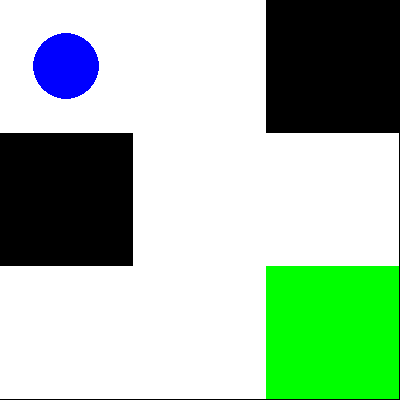

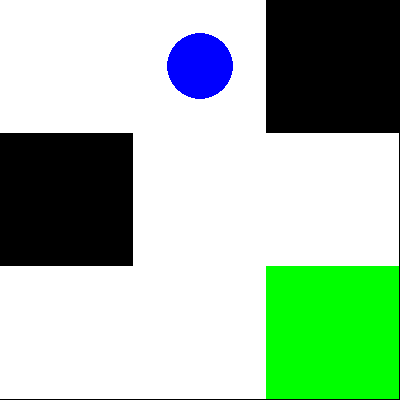

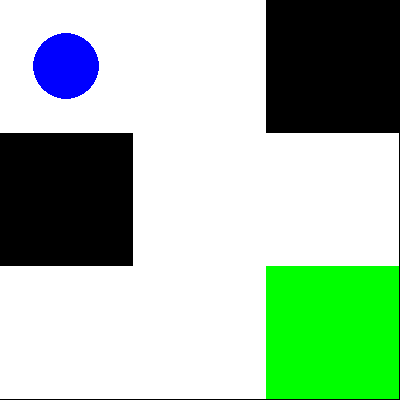

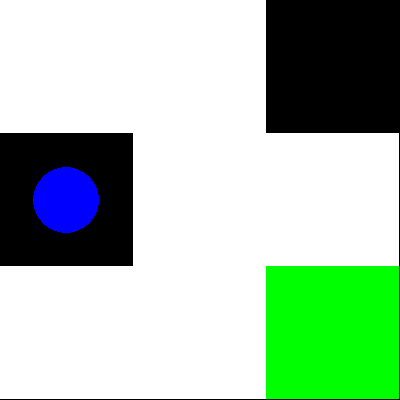

In [ ]:
import cv2
from IPython.display import clear_output
from google.colab.patches import cv2_imshow
import time

# gotta import random
import random

# np.random.seed(2024)
# random.seed(2024)

lake = FrozenLake(3, 3, "IIHHIIIIG")
window_width = 400
window_height = 400
pygame.init()
screen = pygame.display.set_mode((window_width, window_height))

for i in range(0, 1):
  observation, info = lake.reset()
  terminated = False
  while not terminated:
    action = lake.action_space.sample()
    observation, reward, terminated, truncated, info = lake.step(action)
    lake.render(screen, window_width, window_height)

    view = pygame.surfarray.array3d(screen)
    view = view.transpose([1, 0, 2])
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
    cv2_imshow(img_bgr)
    time.sleep(.5)

# Part 2: Implement Q-Learning

We will implement a simple algorithm that should be able to solve any gymnasium environment with discrete observation and action spaces.

In the init function we will pass in the environment as well as the percentage of time the policy should explore versus exploit. We will also pass in gamma and alpha as defined in the bellman equation you learned in class. obs_space_n and action_space_n should represent the dimensions of the observation and action spaces.

We have defined everything for you except the Q-Table. Please design this however you want.

In [ ]:
import random

# importing numpy for thq Q-Learning table
# import numpy as np. We already have it at the top. no need to import again



class QLearning():
  def __init__(self, env, exploration, gamma, alpha, obs_space_n, action_space_n):
    self.env = env
    self.exploration = exploration
    self.gamma = gamma
    self.alpha = alpha

    #TODO: Define your q table such that you can easily access the q value for (s,a)

    # populating table with all 0's
    self.q_table = np.zeros((obs_space_n, action_space_n))

    #print(self.q_table)


Define a method that should sample an action from the policy. Remember to balance the amount of exploring you do versus the amount of exploiting.

In [ ]:
class QLearning(QLearning):
  def sample_action(self, observation):

    # epsilon greedy
    if random.random() < self.exploration:
      return self.env.action_space.sample()
    else:
      return np.argmax(self.q_table[observation])

Define a method that updates your q-table.

In [ ]:
class QLearning(QLearning):
  def update_table(self, observation, action, reward, new_observation, terminated):

    # finding max
    next_max = np.max(self.q_table[new_observation])

    # q-value
    self.q_table[observation, action] = (1 - self.alpha) * self.q_table[observation, action] + self.alpha * (reward + (self.gamma * next_max))

In [ ]:
lake = FrozenLake(5, 5, "IIIHIHIHHHIIIIGIIIIHIIIIH")
#lake = FrozenLake(5, 5, "IIIIIIIIIIIIIIIIIIIIIIIIG")
q_learning = QLearning(lake, .3, .99, .9, lake.width * lake.height, lake.action_space.n)

# TODO: Train your policy using QLearning


total_episodes = 1000
reward_per_episode = []
step_per_state = []

for i in range(total_episodes):

  # need to reset environment on every iteration
  current_observation = q_learning.env.reset()
  current_reward = 0
  num_of_steps = 0
  terminated = False


  #print(q_learning.q_table)


  while not terminated:
    # action
    curr_action = q_learning.sample_action(current_observation)
    next_observation, reward, terminated, truncated, info = q_learning.env.step(curr_action)

    # table update
    q_learning.update_table(current_observation, curr_action, reward, next_observation, terminated)

    current_reward += reward
    num_of_steps += 1

    current_observation = next_observation

  reward_per_episode.append(current_reward)
  step_per_state.append(num_of_steps)

Use the two classes defined below to train your policy so that it solves the environment.

If you have trained everything right this method should demonstrate a solved environment. Please make sure to include these results in your saved PDF.

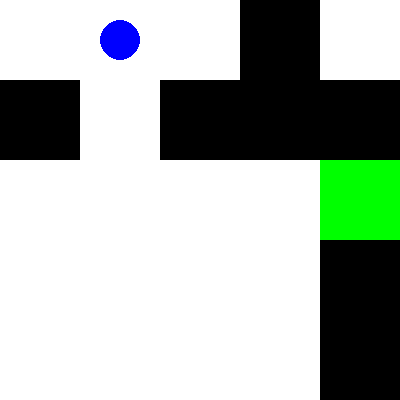

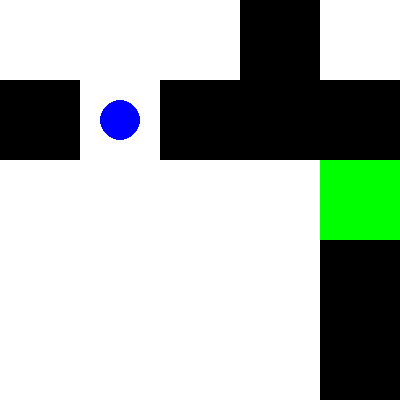

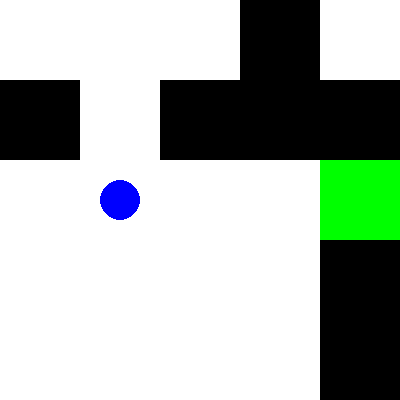

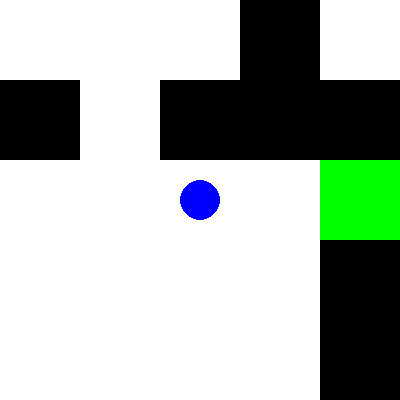

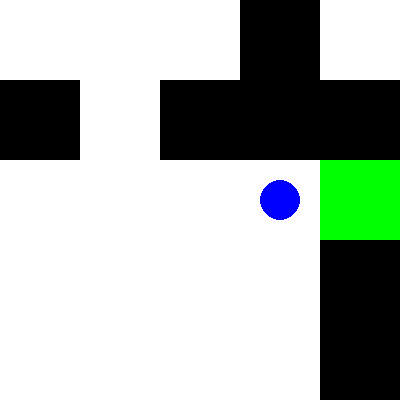

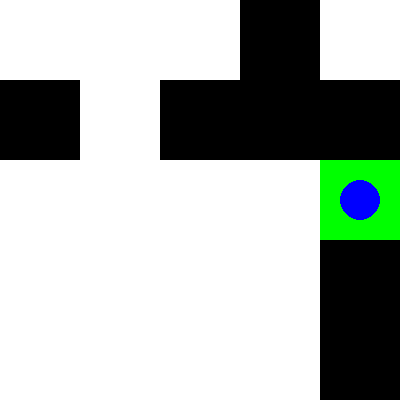

In [ ]:
q_learning.exploration = 0.0
for i in range(0, 1):
  observation, info = lake.reset()
  terminated = False
  lake.render(screen, window_width, window_height)
  view = pygame.surfarray.array3d(screen)
  view = view.transpose([1, 0, 2])
  img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
  cv2_imshow(img_bgr)
  time.sleep(.5)
  clear_output()
  while not terminated:
    action = q_learning.sample_action(observation)
    #action = q_learning.sample_action(observation[0] * lake.width + observation[1])
    observation, reward, terminated, truncated, info = lake.step(action)
    lake.render(screen, window_width, window_height)

    view = pygame.surfarray.array3d(screen)
    view = view.transpose([1, 0, 2])
    img_bgr = cv2.cvtColor(view, cv2.COLOR_RGB2BGR)
    cv2_imshow(img_bgr)
    time.sleep(.5)

In [ ]:
!jupyter nbconvert --to html /content/WORKINGReinforcementLearningFINAL.ipynb

[NbConvertApp] WARNING | pattern '/content/WORKINGReinforcementLearningFINAL.ipynb' matched no files
This application is used to convert notebook files (*.ipynb)
        to various other formats.


Options
The options below are convenience aliases to configurable class-options,
as listed in the "Equivalent to" description-line of the aliases.
To see all configurable class-options for some <cmd>, use:
    <cmd> --help-all

--debug
    set log level to logging.DEBUG (maximize logging output)
    Equivalent to: [--Application.log_level=10]
--show-config
    Show the application's configuration (human-readable format)
    Equivalent to: [--Application.show_config=True]
--show-config-json
    Show the application's configuration (json format)
    Equivalent to: [--Application.show_config_json=True]
--generate-config
    generate default config file
    Equivalent to: [--JupyterApp.generate_config=True]
-y
    Answer yes to any questions instead of prompting.
    Equivalent to: [--JupyterApp

In [ ]:
!ls /content/

sample_data
